## Import Library

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython.display import Image

%matplotlib inline

# Mendeklarasikan Gambar


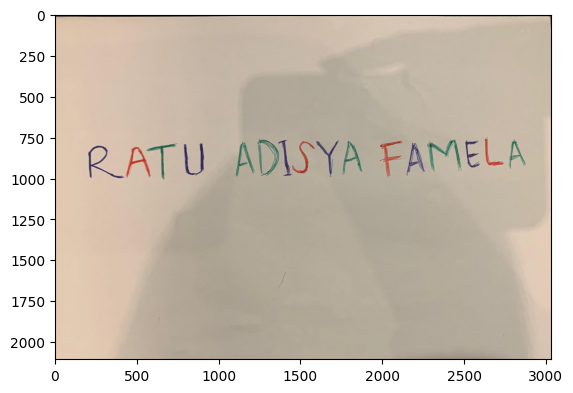

In [28]:
color_image = img.imread('nama.jpg')
plt.imshow(color_image)

## Deteksi Warna Pada Citra

In [29]:
image = plt.imread('nama.jpg')

In [30]:
image_array = np.array(image)

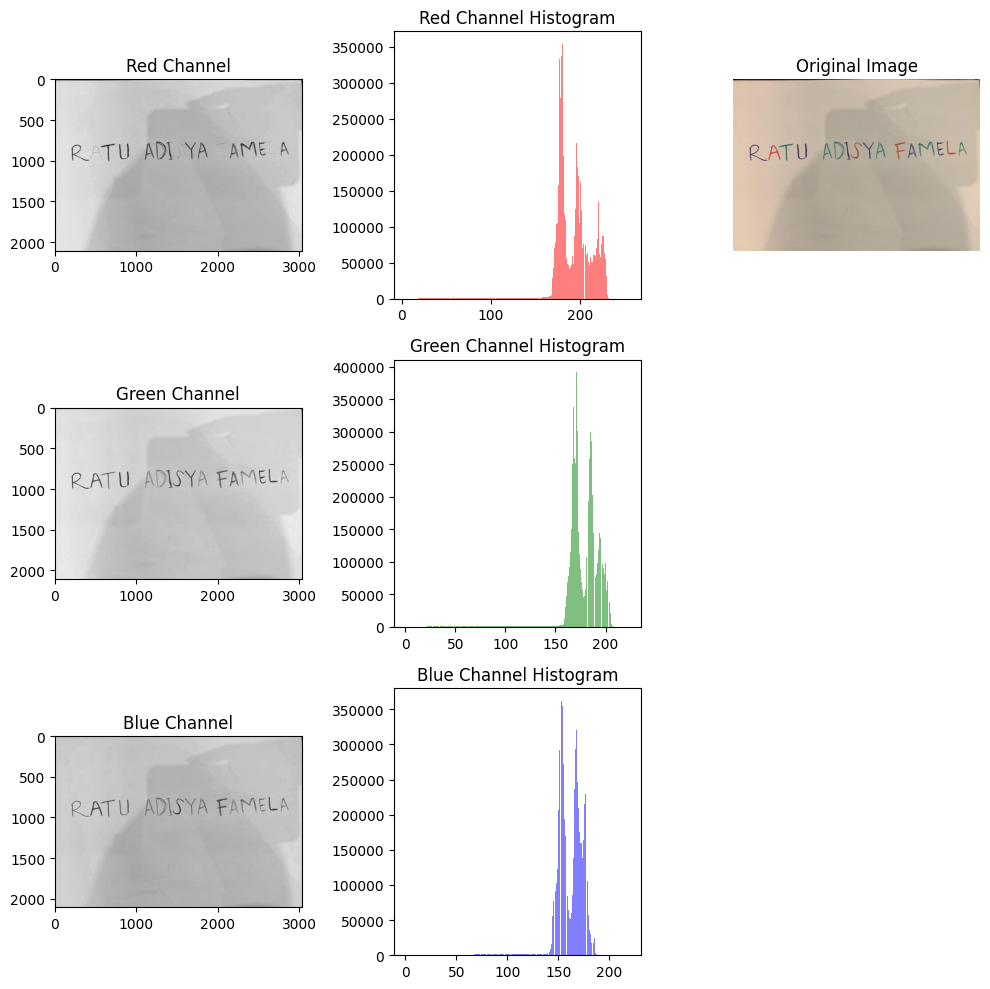

In [45]:
# Pisahkan saluran warna
red = image_array[:,:,0]
green = image_array[:,:,1]
blue = image_array[:,:,2]

# Menyiapkan subplot
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

# Menampilkan gambar asli
ax[0, 2].imshow(image_array)
ax[0, 2].set_title("Original Image")

# Menampilkan saluran warna merah
ax[0, 0].imshow(red, cmap=plt.cm.gray)
ax[0, 0].set_title("Red Channel")

# Menampilkan histogram untuk saluran warna merah
ax[0, 1].hist(red.ravel(), bins=256, color='red', alpha=0.5)
ax[0, 1].set_title('Red Channel Histogram')

# Menampilkan saluran warna hijau
ax[1, 0].imshow(green, cmap=plt.cm.gray)
ax[1, 0].set_title("Green Channel")

# Menampilkan histogram untuk saluran warna hijau
ax[1, 1].hist(green.ravel(), bins=256, color='green', alpha=0.5)
ax[1, 1].set_title('Green Channel Histogram')

# Menampilkan saluran warna biru
ax[2, 0].imshow(blue, cmap=plt.cm.gray)
ax[2, 0].set_title("Blue Channel")

# Menampilkan histogram untuk saluran warna biru
ax[2, 1].hist(blue.ravel(), bins=256, color='blue', alpha=0.5)
ax[2, 1].set_title('Blue Channel Histogram')

# Kosongkan subplot yang tidak digunakan
for i in range(3):
    ax[i, 2].axis('off')

# Perataan subplot
fig.tight_layout()
plt.show()

## Membuat ambang batas citra

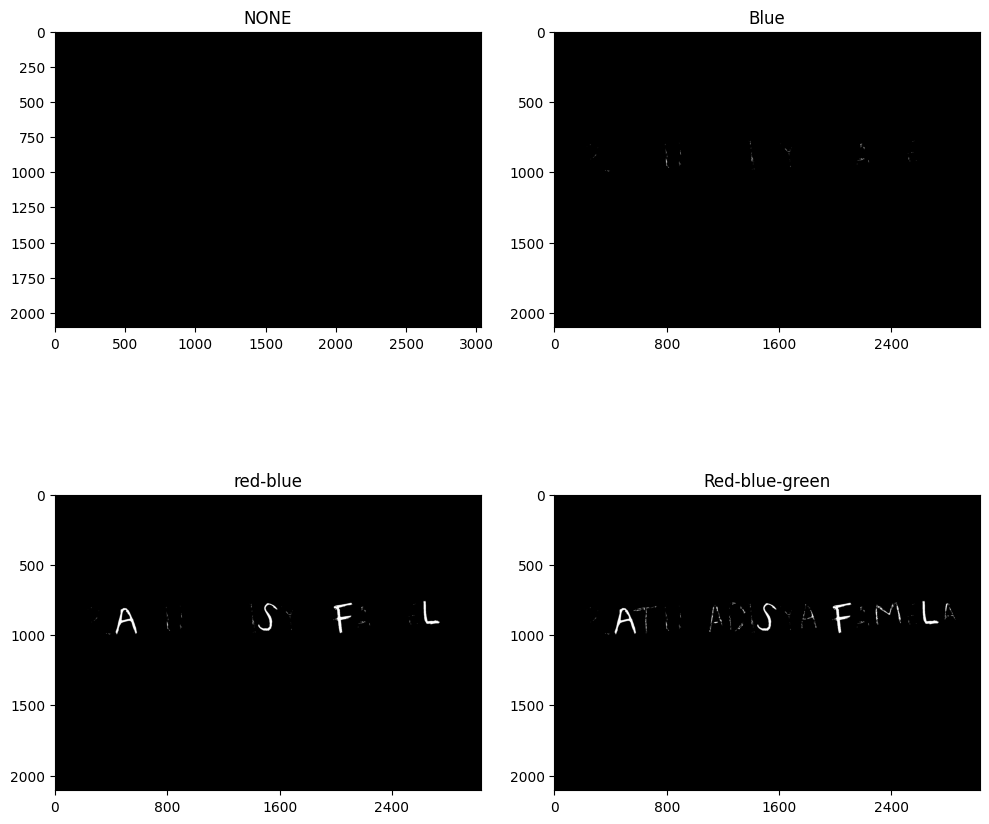

In [46]:
# Membaca gambar
color_image = cv2.imread('nama.jpg')

# Konversi citra ke dalam ruang warna HSV
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Definisikan rentang warna untuk setiap warna
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Gabungkan masker untuk warna merah dan biru
mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
# Gabungkan masker untuk warna merah dan biru
mask_red_blue_green = cv2.bitwise_or(cv2.bitwise_or(mask_red, mask_blue), mask_green)

# Plot hasil

#gambar 1
gray = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

#gambar 2
plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

#gambar 3
plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('red-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#gambar 4
plt.subplot(2, 2, 4)
plt.imshow(mask_red_blue_green, cmap='gray')
plt.title('Red-blue-green')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#menampilkan output
plt.tight_layout()
plt.show()